# About Dataset


# Problem Statement
## A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

## They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

### Which variables are significant in predicting the price of a car
### How well those variables describe the price of a car
### Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# Business Goal
### We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#converter
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
#models importer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# checking for Null Values
df.isnull().sum().sum()

0

In [7]:
# checking for dupliacted rows
df.duplicated().sum()

0

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
labelencoder=LabelEncoder()
df['price']=labelencoder.fit_transform(df['price'])

In [12]:
# Converting the categprical features to numerical features
for i in df.columns:
    if df[i].dtype == "object":
        df[i]=df[i].astype('category').cat.codes

In [13]:
df.dtypes

car_ID                int64
symboling             int64
CarName               int16
fueltype               int8
aspiration             int8
doornumber             int8
carbody                int8
drivewheel             int8
enginelocation         int8
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype             int8
cylindernumber         int8
enginesize            int64
fuelsystem             int8
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price                 int64
dtype: object

In [14]:
x = df.drop('price',axis=1)
y = df['price']

In [15]:
print(x.shape)
print(y.shape)

(205, 25)
(205,)


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression
#Install the LinearRegression model to predict the cost
linear=LinearRegression()
#fit the model to the train data
linear.fit(x_train,y_train)
linear_pred=linear.predict(x_test)
linear_pred

array([167.74549786, 145.76036838,  57.89799209, 126.61814876,
       186.51121425,  36.10798877,  66.35426194,  31.9780455 ,
        83.26233802,  64.19632157, 103.11990125,  38.7241722 ,
       121.3000714 ,  82.90931512, 188.92136357,  25.70962514,
       -26.22876207, 113.80467487,  59.00328426,  83.93341233,
        70.27945155, 146.16217001,  40.86343974, -31.0107426 ,
        33.0204572 , 168.77221849, 106.2023329 , 130.22678384,
        29.60194262, 131.755921  , 181.29799181,  27.97456444,
        37.30242009, 137.73076059,  71.836363  , 185.75486246,
        87.73679458, 111.64753252,  14.9275919 , 117.83954259,
        42.47724869])

In [34]:
acc_lr=linear.score(x_test,y_test)
print(linear.score(x_test,y_test))
print(linear.score(x_train,y_train))

0.8505433301217906
0.902904108266557


In the above code, we import the mean_absolute_error, mean_squared_error, and r2_score functions from scikit-learn's metrics module. We then create example true and predicted values for a regression task.

The mean_absolute_error function is used to calculate the mean absolute error between the true and predicted values. The mean_squared_error function is used to calculate the root mean squared error between the true and predicted values (the squared=False argument is included to return the RMSE instead of the MSE). The r2_score function is used to calculate the coefficient of determination (R-squared) between the true and predicted values.

# DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=6).fit(x_train,y_train)
pred = dt.predict(x_test)
dt.score(x_test,y_test)

0.8097691763465175

In [36]:
pred

array([184.        , 150.6       ,  72.25      , 104.25      ,
       175.5       ,   0.        ,  37.75      ,  54.        ,
        67.33333333,  54.        , 104.25      ,  54.        ,
        67.33333333,  85.84615385, 188.        ,  13.42857143,
         5.2       , 135.51612903,  67.33333333,  72.25      ,
        85.84615385, 135.51612903,   0.        ,   5.2       ,
        35.55555556, 184.        ,  85.84615385, 135.51612903,
        28.        , 135.51612903, 175.5       ,  13.42857143,
        26.        , 164.8       ,  49.        , 175.5       ,
        67.33333333, 104.        ,  20.        , 135.51612903,
        37.75      ])

In [37]:
acc_dt=dt.score(x_test,y_test)
print(dt.score(x_test,y_test))
print(dt.score(x_train,y_train))

0.8097691763465175
0.9693347949889978


# RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=180)
rfr.fit(x_train,y_train)
acc_rf=rfr.score(x_test,y_test)
print(rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))

0.9873143043992817
0.925059147281125


# LASSO

In [39]:
from sklearn.linear_model import Lasso

In [40]:
model = Lasso(alpha=1.0)
# fit model
model.fit(x_train,y_train)
acc_lasso=model.score(x_test,y_test)

In [41]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8897310764710495
0.8381758510715496


# KNeighborsRegressor

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train,y_train)
acc_knn=knn.score(x_test,y_test)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.950568467208285
0.8376622947337622


In [43]:
import pandas as pd
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'lasso', 'decision tree',"knn"],
    'accuracy Score': [acc_lr*100, acc_rf*100, acc_lasso*100, acc_dt*100,acc_knn*100]})
models.sort_values(by='accuracy Score', ascending=False)

,Model,accuracy Score
1,Random Forest,92.505915
0,Linear Regression,85.054333
2,lasso,83.817585
4,knn,83.766229
3,decision tree,80.976918


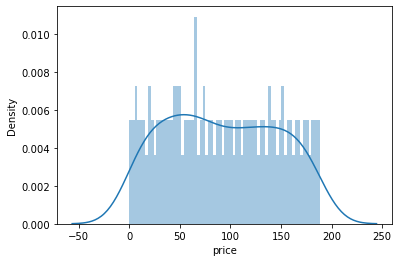

In [44]:
sns.distplot(df['price'], bins=70)
plt.show()

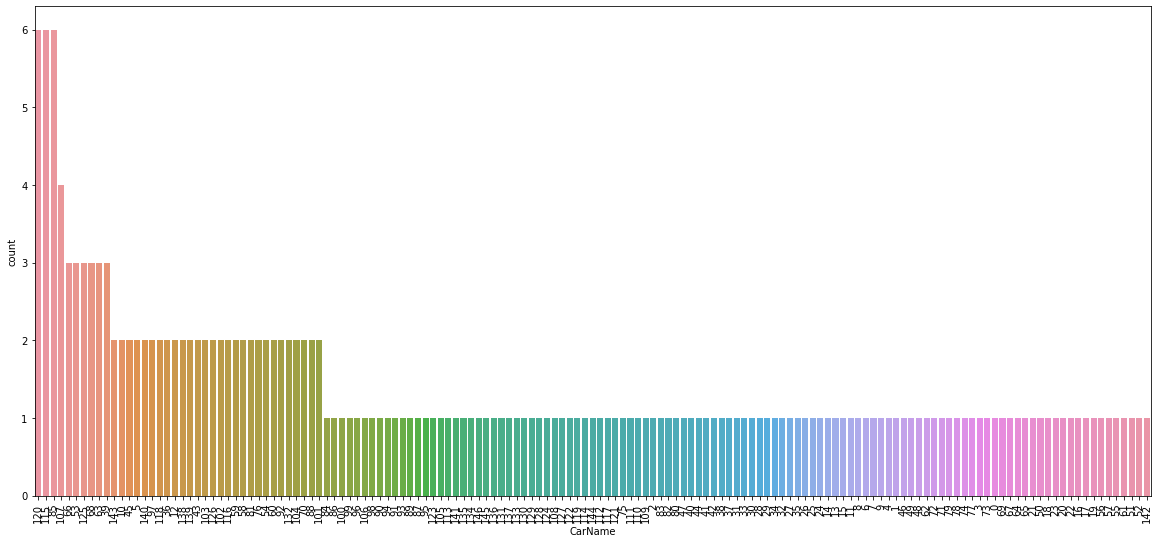

In [45]:
plt.figure(figsize=(20,9))

plt.xticks(rotation = 90)
order = df['CarName'].value_counts(ascending=False).index
sns.countplot(x='CarName', data=df, order=order)

plt.show()


<AxesSubplot:>

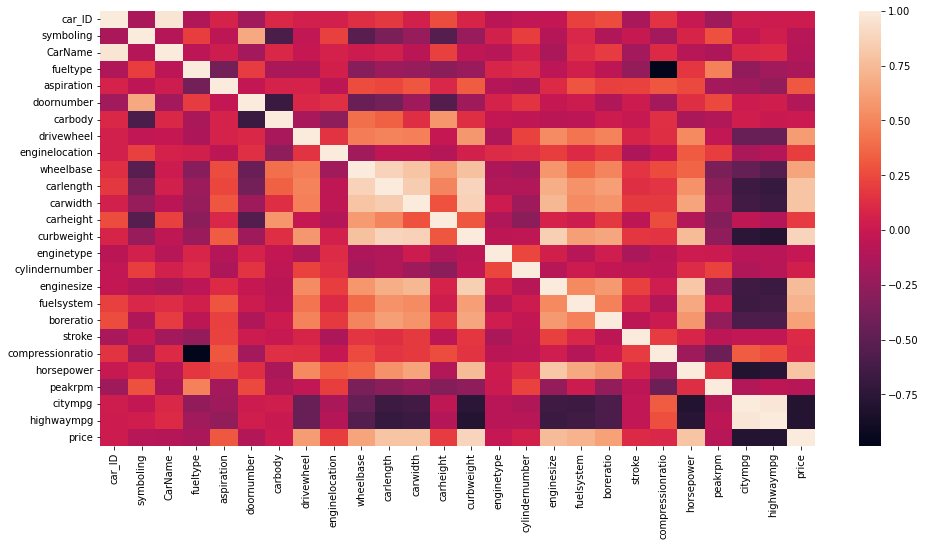

In [46]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr())

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# define X_train, y_train, and y_test

# create a list of regression models to test
models = [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(),
          RandomForestRegressor(), SVR(), Lasso()]

# iterate over each model, fit it to training data, generate predictions on test data,
# and calculate evaluation metrics
for model in models:
    # instantiate the model
    regressor = model
    
    # fit the model to the training data
    regressor.fit(x_train, y_train)
    
    # generate predictions on test data
    y_pred = regressor.predict(x_test)
    
    # calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    # print the evaluation metrics for the current model
    print("Model:", type(regressor).__name__)
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r2)
    print()


Model: LinearRegression
Mean Absolute Error: 16.862124135857712
Root Mean Squared Error: 20.418368708530085
R-squared: 0.8505433301217906

Model: DecisionTreeRegressor
Mean Absolute Error: 15.24390243902439
Root Mean Squared Error: 22.62580008018043
R-squared: 0.8164809686352805

Model: KNeighborsRegressor
Mean Absolute Error: 15.346341463414632
Root Mean Squared Error: 19.31974852131438
R-squared: 0.8661938251548147

Model: RandomForestRegressor
Mean Absolute Error: 12.16829268292683
Root Mean Squared Error: 15.473971221566027
R-squared: 0.9141625540129414

Model: SVR
Mean Absolute Error: 43.04888807598693
Root Mean Squared Error: 50.77659380169446
R-squared: 0.0757268313879379

Model: Lasso
Mean Absolute Error: 16.646549847605563
Root Mean Squared Error: 21.246385495787212
R-squared: 0.8381758510715496



In [53]:
model_names = []
mae_scores = []
rmse_scores = []
r2_scores = []
# store the evaluation metrics in lists
model_names.append(type(regressor).__name__)
mae_scores.append(mae)
rmse_scores.append(rmse)
r2_scores.append(r2)


In [61]:
metrics = {'MAE': mean_absolute_error,
           'RMSE': lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False),
           'R-squared': r2_score}

results = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'R-squared'])

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results = results.append({'Model': model_name, 'MAE': mae, 'RMSE': rmse, 'R-squared': r2}, ignore_index=True)

results['R-squared'] = results['R-squared'].apply(lambda x: f'{x*100:.2f}%')
    
print(results)


                       Model        MAE       RMSE R-squared
0          Linear Regression  16.862124  20.418369    85.05%
1              Decision Tree  13.414634  18.849856    87.26%
2        K-Nearest Neighbors  15.346341  19.319749    86.62%
3              Random Forest  11.735366  14.629445    92.33%
4  Support Vector Regression  43.048888  50.776594     7.57%
5           Lasso Regression   16.64655  21.246385    83.82%
